## Монтируем гугл-диск к виртуальной машине

In [ ]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')

## Скачиваем репозиторий *курса*

In [4]:


%cd /content/drive/MyDrive/
%pwd


os.makedirs ('UClim4HSE', exist_ok = True)

%cd /content/drive/MyDrive/UClim4HSE/
%pwd

if not os.path.isdir('/content/drive/MyDrive/UClim4HSE/UClim4HSE-2025'):
  print ('cloning repository')
  !git clone https://github.com/mvarentsov/UClim4HSE-2025.git
else:
  print ('updating repository')
  %cd /content/drive/MyDrive/UClim4HSE/UClim4HSE-2025/
  ! git pull

%cd /content/drive/MyDrive/UClim4HSE/


/content/drive/MyDrive
/content/drive/MyDrive/UClim4HSE
cloning repository
Cloning into 'UClim4HSE-2025'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 110 (delta 41), reused 68 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (110/110), 28.20 MiB | 13.42 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/drive/MyDrive/UClim4HSE


In [5]:
sys.path.append('/content/drive/MyDrive/UClim4HSE/UClim4HSE-2025/scripts/')
import meteo_utils
from datetime import date, datetime, timedelta

In [8]:

station_id = 27605     # идентификатор станции, с которой нужны наблюдения
start = date (2023,1,1) # начало периода загрузки данных
end = date (2024,1,1) #date.today()      # конец  периода загрузки данных

meteo_utils.load_weaclim4period (station_id, start, end, 'weaclim_data', adress="http://www.pogodaiklimat.ru/weather.php?")


Loading weaclim data for 27605: 100%|██████████| 13/13 [01:27<00:00,  6.75s/it, Processing: 2024-01]


In [14]:
df_urb = meteo_utils.read_weaclim_dir ('weaclim_data/27605')
df_rur = meteo_utils.read_weaclim_dir ('weaclim_data/27518')

df_rur.head()

,t2m,rh2m,slp,ps,vel10m,gust10m,tcc,lcc,dir10m
Datetime,,,,,,,,,
2023-12-31 12:00:00,0.9,100.0,1017.9,996.6,1.0,NaN,10.0,10.0,315.0
2023-12-31 15:00:00,0.7,100.0,1018.1,996.8,1.0,NaN,10.0,10.0,225.0
2023-12-31 18:00:00,0.1,100.0,1016.9,995.6,3.0,NaN,8.0,0.0,180.0
2023-12-31 21:00:00,0.4,100.0,1014.8,993.6,4.0,NaN,10.0,10.0,180.0
2023-01-02 03:00:00,1.3,99.0,1008.6,987.5,3.0,NaN,10.0,10.0,315.0


In [16]:
df_urb = df_urb.rename(columns = {x:'urb_' + x for x in df_urb.columns})
df_rur = df_rur.rename(columns = {x:'rur_' + x for x in df_rur.columns})

df = df_urb.merge (df_rur, left_index=True, right_index=True)
display(df.head())


,urb_t2m,urb_rh2m,urb_slp,urb_ps,urb_vel10m,urb_gust10m,urb_tcc,urb_lcc,urb_dir10m,rur_t2m,rur_rh2m,rur_slp,rur_ps,rur_vel10m,rur_gust10m,rur_tcc,rur_lcc,rur_dir10m
Datetime,,,,,,,,,,,,,,,,,,
2023-01-02 03:00:00,2.3,84,1007.5,992.0,3.0,NaN,10.0,10.0,315.0,1.3,99.0,1008.6,987.5,3.0,NaN,10.0,10.0,315.0
2023-01-02 06:00:00,0.8,78,1011.6,996.0,3.0,NaN,10.0,0.0,270.0,-0.8,96.0,1012.6,991.2,1.0,NaN,0.0,0.0,315.0
2023-01-02 09:00:00,0.8,66,1014.4,998.7,3.0,NaN,0.0,0.0,270.0,0.9,70.0,1015.2,993.9,1.0,NaN,1.0,0.0,315.0
2023-01-02 12:00:00,0.7,63,1017.0,1001.3,3.0,10.0,3.0,0.0,270.0,-0.1,71.0,1017.8,996.4,2.0,NaN,8.0,0.0,315.0
2023-01-02 15:00:00,-0.1,67,1018.5,1002.7,2.0,NaN,0.0,0.0,270.0,-1.6,79.0,1019.6,998.0,1.0,NaN,1.0,0.0,270.0


(19570.0, 19601.0)

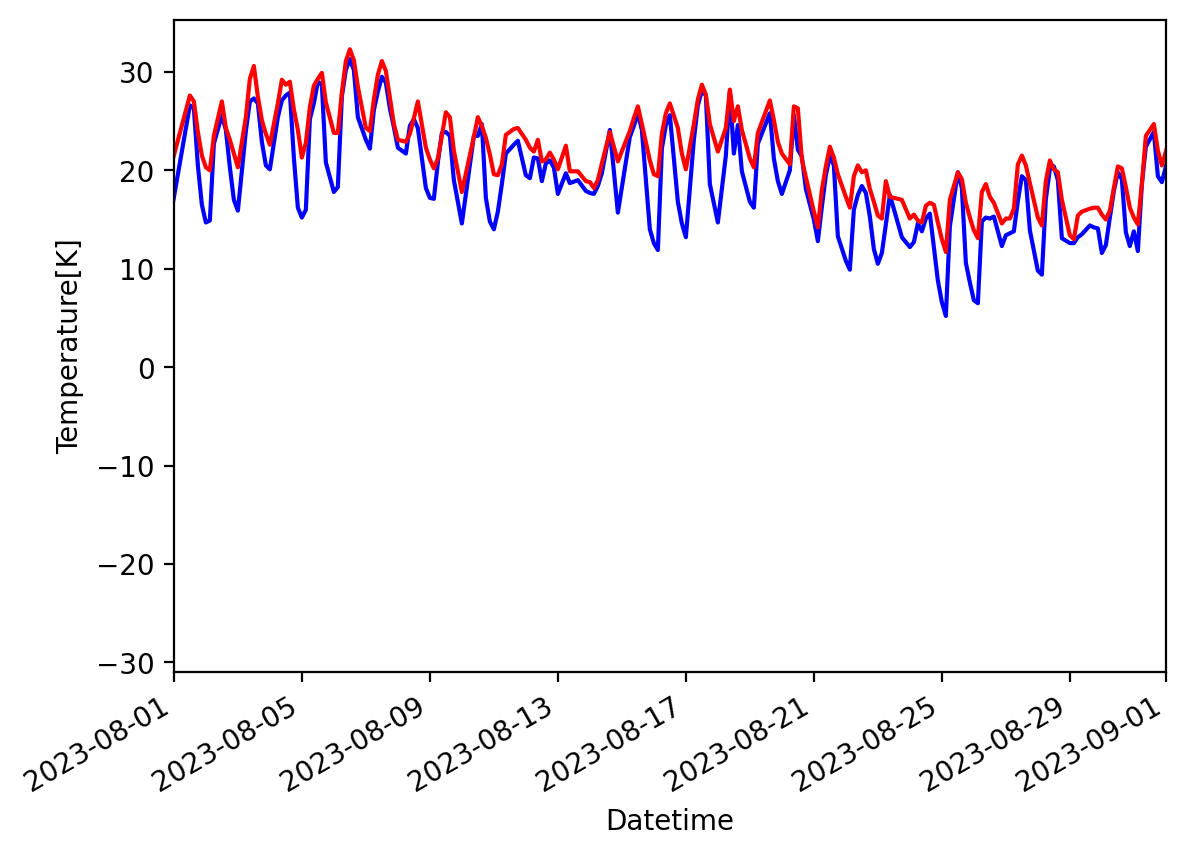

In [22]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 200

# plt.figure()
# df['rur_t2m'].plot(color = 'blue')
# df['urb_t2m'].plot(color = 'red')
# plt.ylabel ('Temperature[K]')

# df_sel = df['2023-08':'2023-09']
# plt.figure()
# df_sel['rur_t2m'].plot(color = 'blue')
# df_sel['urb_t2m'].plot(color = 'red')
# plt.ylabel ('Temperature[K]')

#df_sel = df['2023-08':'2023-09-01']
plt.figure()
df['rur_t2m'].plot(color = 'blue')
df['urb_t2m'].plot(color = 'red')
plt.ylabel ('Temperature[K]')
plt.xlim((datetime(2023,8,1), datetime(2023,9,1)))



## Интерактивный график с помощью plotly

In [23]:

import plotly.express as px

fig = px.line(df, y=['rur_t2m', 'urb_t2m'], title='Simple Time Series Plot') #, labels={'Value': 'Cumulative Value'})
fig.data[0].line.color = 'blue'  # Color for 'rur_t2m'
fig.data[1].line.color = 'orange'  # Color for 'urb_t2m'
fig.show()

In [34]:
#df_day_mean = df.resample ('1ME').mean()
df_day_mean = df.groupby(df.index.month).min()


display(df_day_mean)

fig = px.line(df_day_mean, y=['rur_t2m', 'urb_t2m'], title='Simple Time Series Plot') #, labels={'Value': 'Cumulative Value'})
fig.data[0].line.color = 'blue'  # Color for 'rur_t2m'
fig.data[1].line.color = 'orange'  # Color for 'urb_t2m'
fig.show()


,urb_t2m,urb_rh2m,urb_slp,urb_ps,urb_vel10m,urb_gust10m,urb_tcc,urb_lcc,urb_dir10m,rur_t2m,rur_rh2m,rur_slp,rur_ps,rur_vel10m,rur_gust10m,rur_tcc,rur_lcc,rur_dir10m
Datetime,,,,,,,,,,,,,,,,,,
1,-24.8,52,989.9,974.5,0.0,10.0,0.0,0.0,0.0,-28.0,54.0,990.4,969.3,0.0,10.0,0.0,0.0,0.0
2,-15.3,50,991.3,976.0,0.0,10.0,0.0,0.0,0.0,-17.8,55.0,990.0,969.2,0.0,10.0,0.0,0.0,0.0
3,-5.6,20,984.3,969.3,0.0,10.0,0.0,0.0,0.0,-11.7,19.0,984.8,964.5,0.0,10.0,0.0,0.0,0.0
4,0.4,15,1001.5,986.7,0.0,10.0,0.0,0.0,0.0,-2.7,14.0,1002.4,982.1,0.0,10.0,0.0,0.0,0.0
5,2.7,20,1012.3,997.3,0.0,11.0,0.0,0.0,0.0,-3.1,21.0,1002.0,992.5,0.0,10.0,0.0,0.0,0.0
6,7.5,19,997.3,982.7,0.0,10.0,0.0,0.0,0.0,3.1,24.0,998.4,978.6,0.0,10.0,0.0,0.0,0.0
7,12.2,24,994.5,980.0,0.0,10.0,0.0,0.0,0.0,10.1,28.0,995.1,975.3,0.0,10.0,0.0,0.0,0.0
8,11.7,34,1007.3,993.3,0.0,NaN,0.0,0.0,0.0,5.2,38.0,1007.8,988.3,0.0,10.0,0.0,0.0,0.0
9,9.1,27,1013.8,999.6,0.0,10.0,0.0,0.0,0.0,1.1,32.0,1014.0,994.5,0.0,10.0,0.0,0.0,0.0
